C:\Users\Juango\AppData\Local\Temp\ipykernel_16872\2557264039.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hate_crime_summary['bias_desc'] = hate_crime_summary['bias_desc'].str.split(';')


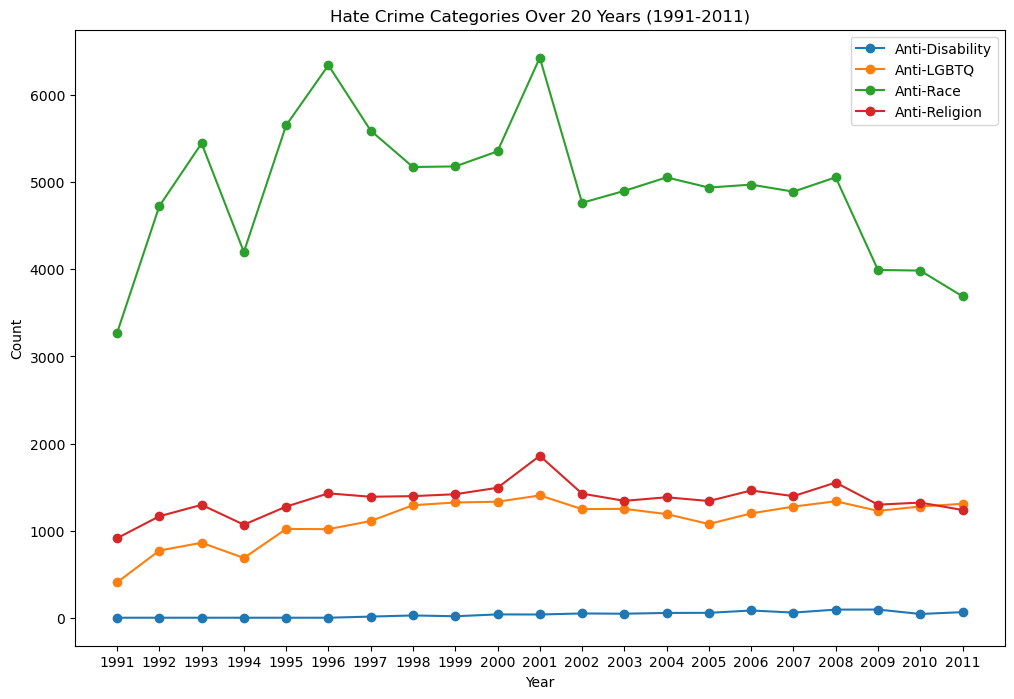

C:\Users\Juango\AppData\Local\Temp\ipykernel_16872\2557264039.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_processed['Before_After'] = pd.Categorical(crime_processed['Before_After'], categories=order, ordered=True)
C:\Users\Juango\AppData\Local\Temp\ipykernel_16872\2557264039.py:70: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = crime_processed.groupby(['Before_After', 'Bias_Category']).size().unstack()


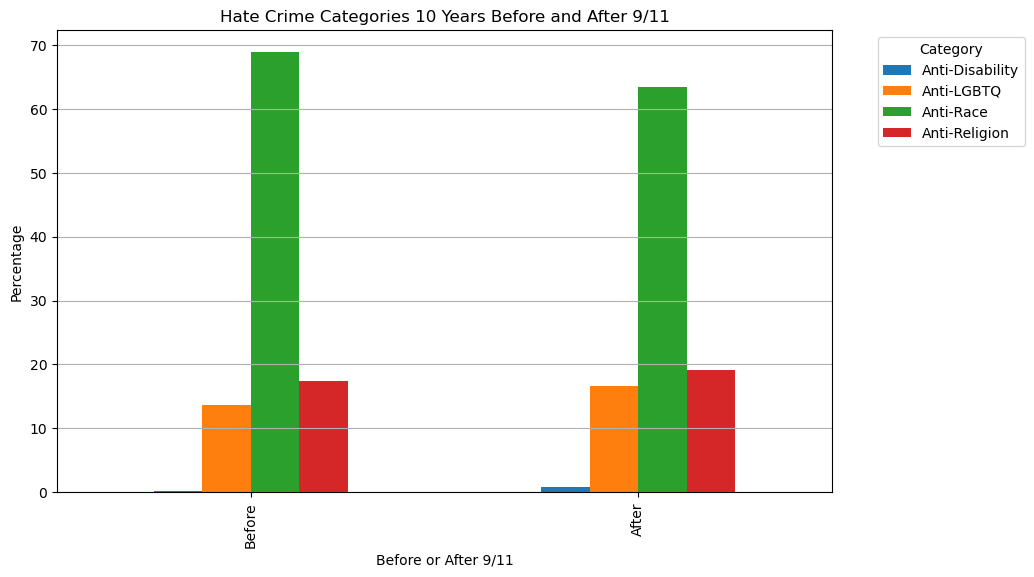

C:\Users\Juango\AppData\Local\Temp\ipykernel_16872\2557264039.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_processed['Bias_Category'] = pd.Categorical(crime_processed['Bias_Category'], categories=order, ordered=True)
C:\Users\Juango\AppData\Local\Temp\ipykernel_16872\2557264039.py:84: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = crime_processed.groupby(['data_year', 'Bias_Category']).size().unstack()


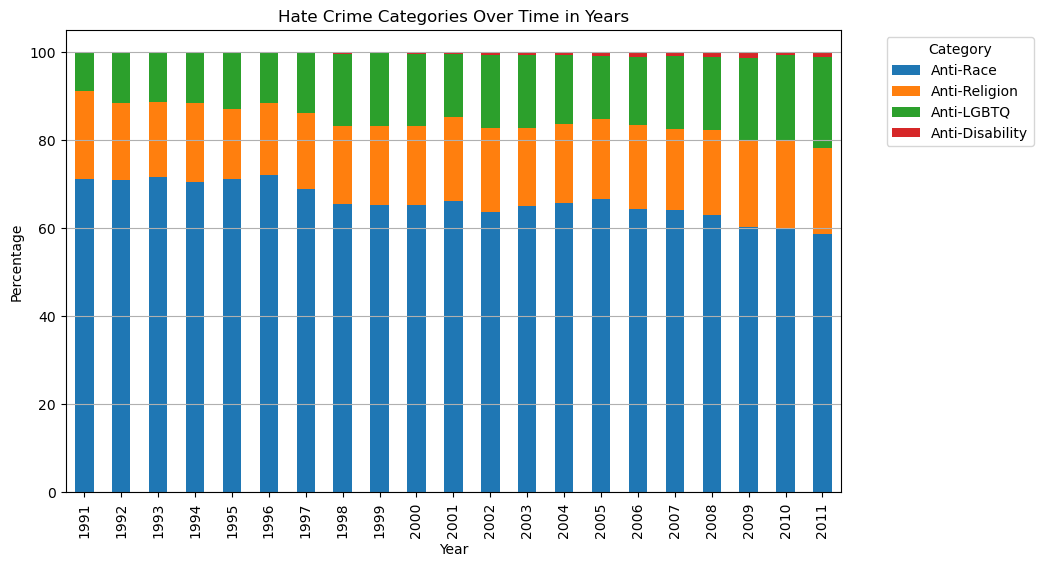

The p-value associated with the Anti-Race hate crime percentages before and after 9/11 is 1.0
The p-value associated with the Anti-Religion hate crime percentages before and after 9/11 is 1.0
The p-value associated with the Anti-LGBTQ hate crime percentages before and after 9/11 is 1.0
The p-value associated with the Anti-Disability hate crime percentages before and after 9/11 is 1.0


C:\Users\Juango\AppData\Local\Temp\ipykernel_16872\2557264039.py:124: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = crime_processed.groupby(['Before_After', 'Bias_Category']).size().unstack()
C:\Users\Juango\AppData\Local\Temp\ipykernel_16872\2557264039.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percentage_data_subset['P-Value'] = p_values
C:\Users\Juango\AppData\Local\Temp\ipykernel_16872\2557264039.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

def read_data(file_path):
    return pd.read_csv(file_path)

def clean_data(crime_data):
    columns_to_keep = ['incident_id', 'state_abbr', 'data_year', 'incident_date', 'victim_count', 'offender_race', 'bias_desc']
    hate_crime_summary = crime_data[columns_to_keep]
    hate_crime_summary['bias_desc'] = hate_crime_summary['bias_desc'].str.split(';')
    expanded_df = hate_crime_summary.explode('bias_desc')
    grouped_df = expanded_df.groupby('bias_desc').size().reset_index(name='count')
    grouped_df = grouped_df.sort_values(by='count', ascending=False)
    return hate_crime_summary, grouped_df

def categorize_bias(bias_desc):
    mapping = {
        "Anti-Race": ["Anti-Black or African American", "Anti-Hispanic or Latino", 'Anti-Other Race/Ethnicity/Ancestry', 'Anti-Asian',
                      "Anti-Multiple Races, Group", 'Anti-Arab', 'Anti-American Indian or Alaska Native', 
                      'Anti-American Indian or Alaska Native', 'Anti-American Indian or Alaska Native','Anti-Native Hawaiian or Other Pacific Islander',
                      'Anti-White'],
        'Anti-LGBTQ': ['Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)', 'Anti-Gender Non-Conforming', 'Anti-Gay (Male)', 
                       'Anti-Lesbian (Female)', 'Anti-Transgender', 'Anti-Bisexual', 'Anti-Heterosexual'],
        'Anti-Religion': ['Anti-Jewish', 'Anti-Islamic (Muslim)', 'Anti-Catholic', 'Anti-Multiple Religions, Group','Anti-Protestant', 
                          'Anti-Atheism/Agnosticism', "Anti-Jehova's Witness", "Anti-Other Christian", "Anti-Other Religion", "Anti-Hindu", "Anti-Buddhist",
                          "Anti-Church of Jesus Christ", "Anti-Eastern Orthodox (Russian, Greek, Other)", "Anti-Sikh"],
        'Anti-Disability': ["Anti-Mental Disability", "Anti-Physical Disability"],
        'Gender': ["Anti-Female","Anti-Male"],
        'Unknown': ["Unknown (offender's motivation not known)"]
    }
    
    for category, keywords in mapping.items():
        if any(keyword in bias_desc for keyword in keywords):
            return category
        
    return 'Other'

def process_data(hate_crime_summary):
    hate_crime_processed = hate_crime_summary.copy()
    hate_crime_processed['Bias_Category'] = hate_crime_processed['bias_desc'].apply(categorize_bias)
    hate_crime_processed.to_csv('output_file.csv', index=False)
    return hate_crime_processed

def create_before_after_column(hate_crime_processed):
    hate_crime_processed['Before_After'] = np.where(hate_crime_processed['incident_date'] < '2001-09-11', 'Before', 'After')
    hate_crime_processed = hate_crime_processed[hate_crime_processed['incident_date'] < "2012"]
    return hate_crime_processed

def visualize_scatter_plot(crime_processed):
    grouped_data_scatter = crime_processed.groupby(['data_year', 'Bias_Category']).size().reset_index(name='Count')
    grouped_data_scatter['data_year'] = grouped_data_scatter['data_year'].astype(int)
    pivot_data = grouped_data_scatter.pivot(index='data_year', columns='Bias_Category', values='Count').fillna(0)

    fig, ax = plt.subplots(figsize=(12, 8))
    for category in pivot_data.columns:
        ax.plot(pivot_data.index, pivot_data[category], label=category, marker='o')
    ax.set_xticks(pivot_data.index)
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    ax.set_title('Hate Crime Categories Over 20 Years (1991-2011)')
    ax.legend()
    plt.show()

def visualize_percentage_before_after(crime_processed, title):
    order = ['Before', 'After']
    crime_processed['Before_After'] = pd.Categorical(crime_processed['Before_After'], categories=order, ordered=True)
    grouped_data = crime_processed.groupby(['Before_After', 'Bias_Category']).size().unstack()
    percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

    ax = percentage_data.plot(kind='bar', stacked=False, figsize=(10, 6))
    ax.set_ylabel('Percentage')
    ax.set_xlabel('Before or After 9/11')
    ax.set_title(title)
    ax.yaxis.grid(True)
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

def visualize_percentage_over_time(crime_processed, title):
    order = ['Anti-Race', 'Anti-Religion', 'Anti-LGBTQ', 'Anti-Disability']
    crime_processed['Bias_Category'] = pd.Categorical(crime_processed['Bias_Category'], categories=order, ordered=True)
    grouped_data = crime_processed.groupby(['data_year', 'Bias_Category']).size().unstack()
    percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

    ax = percentage_data.plot(kind='bar', stacked=True, figsize=(10, 6))
    ax.set_ylabel('Percentage')
    ax.set_xlabel('Year')
    ax.set_title(title)
    ax.yaxis.grid(True)
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

def chi_square_test(percentage_data_subset):
    chi2, p_values, _, _ = chi2_contingency(percentage_data_subset)
    percentage_data_subset['P-Value'] = p_values
    print(f'The p-value associated with the {percentage_data_subset.name} hate crime percentages before and after 9/11 is {p_values}')
    return percentage_data_subset

# File to Load
file_path = "/Users/Juango/Desktop/Classwork/Project 1/FBI-Hate-Crime-Analysis-main/hate_crime.csv"
crime_data = read_data(file_path)

# Clean Data
hate_crime_summary, grouped_df = clean_data(crime_data)

# Categorize Bias
hate_crime_processed = process_data(hate_crime_summary)

# Add Before_After column
crime_processed = create_before_after_column(hate_crime_processed)

# Visualize Scatter Plot
visualize_scatter_plot(crime_processed)

# Visualize Percentage Before and After 9/11
visualize_percentage_before_after(crime_processed, 'Hate Crime Categories 10 Years Before and After 9/11')

# Visualize Percentage Over Time
visualize_percentage_over_time(crime_processed, 'Hate Crime Categories Over Time in Years')

# Perform Chi-Square Test
grouped_data = crime_processed.groupby(['Before_After', 'Bias_Category']).size().unstack()
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

bias_categories = ['Anti-Race', 'Anti-Religion', 'Anti-LGBTQ', 'Anti-Disability']
result_df = pd.DataFrame()

for bias_category in bias_categories:
    columns_to_keep = [bias_category]
    percentage_data_subset = percentage_data[columns_to_keep]
    percentage_data_subset.name = bias_category
    result_df = pd.concat([result_df, chi_square_test(percentage_data_subset)])
